In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Funcion hash para mapear de una coordenada (x, y) a un numero natural (de forma univoca)
def hashCoordenadaANumero(valorCoordenadaX, valorCoordenadaY, numeroVerticesAncho):
    return valorCoordenadaX * numeroVerticesAncho + valorCoordenadaY

#Funcion hash para mapear de un numero natural a una coordenada (x, y) (de forma univoca)
def hashNumeroACoordenada(numeroIdentificador, numeroVerticesAncho):
    valorCoordenadaX = numeroIdentificador % numeroVerticesAncho
    valorCoordenadaY = int(numeroIdentificador / numeroVerticesAncho)
    return valorCoordenadaX, valorCoordenadaY

def crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo):
    if nodoOrigen not in grafo:
        grafo[nodoOrigen] = {}
    (grafo[nodoOrigen])[nodoDestino] = costo
    if nodoDestino not in grafo:
        grafo[nodoDestino] = {}
    (grafo[nodoDestino])[nodoOrigen] = costo

def obtenerListasCoordendasGrafo(numeroVerticesAlto, numeroVerticesAncho):
    listaValoresCoordenadaX = []
    listaValoresCoordenadaY = []
    for indice1 in range(numeroVerticesAncho):
        for indice2 in range(numeroVerticesAlto):
            listaValoresCoordenadaX.append(indice1)
            listaValoresCoordenadaY.append(indice2)
    return listaValoresCoordenadaX, listaValoresCoordenadaY

def graficarCarreteras(grafo):
    labelBlue = False
    labelGueen = False
    labelYellow = False
    labelOrange = False
    labelRed = False
    transparencia = 0.75
    for i in grafo:
        for j in grafo[i]:
            if i < j:
                x1, y1 = hashNumeroACoordenada(i, numeroVerticesAncho)
                x2, y2 = hashNumeroACoordenada(j, numeroVerticesAncho)
                #Muy poco trafico -> azul
                if grafo[i][j] <= 0.2:
                    if labelBlue == True:
                        plt.plot([x1, x2], [y1, y2], '', c = '#0000ff', alpha = transparencia)
                    else:
                        plt.plot([x1, x2], [y1, y2], '', c = '#0000ff', alpha = transparencia, label = 'Muy poco')
                        labelBlue = True
                #Poco trafico -> verde
                elif grafo[i][j] <= 0.4:
                    if labelGueen == True:
                        plt.plot([x1, x2], [y1, y2], '', c = '#00ff00', alpha = transparencia)
                    else:
                        plt.plot([x1, x2], [y1, y2], '', c = '#00ff00', alpha = transparencia, label = 'Poco')
                        labelGueen = True
                #Trafico regular -> amarillo
                elif grafo[i][j] <= 0.6:
                    if labelYellow == True:
                        plt.plot([x1, x2], [y1, y2], '', c = '#ffff00', alpha = transparencia)
                    else:
                        plt.plot([x1, x2], [y1, y2], '', c = '#ffff00', alpha = transparencia, label = 'Regular')
                        labelYellow = True
                #Trafico pesado -> naranja
                elif grafo[i][j] <= 0.8:
                    if labelOrange == True:
                        plt.plot([x1, x2], [y1, y2], '', c = '#ffbf00', alpha = transparencia)
                    else:
                        plt.plot([x1, x2], [y1, y2], '', c = '#ffbf00', alpha = transparencia, label = 'Pesado')
                        labelOrange = True
                #Trafico muy pesado -> rojo
                elif grafo[i][j] <= 1.0:
                    if labelRed == True:
                        plt.plot([x1, x2], [y1, y2], '', c = '#ff0000', alpha = transparencia)
                    else:
                        plt.plot([x1, x2], [y1, y2], '', c = '#ff0000', alpha = transparencia, label = 'Muy pesado')
                        labelRed = True


In [3]:
numeroVerticesAlto = 25
numeroVerticesAncho = 25
limiteInferiorCostosEntreAristasDelGrafo = 0.0
limiteSuperiorCostosEntreAristasDelGrafo = 1.0

#plt.rcParams['axes.facecolor'] = 'black'
#tiempoPausa = 0.001
#margenCiudad = 1
#grafo = {}

#temperatura = 1000
#tasaEnfriamiento = 0.99

In [4]:
grafo = {}

#Construccion del grafo en forma de cuadricula para las aristas
for indice1 in range(numeroVerticesAlto):
    for indice2 in range(numeroVerticesAncho - 1):
        crearAristaGrafoNoDirigido(grafo, indice1 * numeroVerticesAncho + indice2, indice1 * numeroVerticesAncho + indice2 + 1, np.random.rand())
for indice1 in range(numeroVerticesAlto - 1):
    for indice2 in range(numeroVerticesAncho):
        crearAristaGrafoNoDirigido(grafo, indice1 * numeroVerticesAncho + indice2, indice1 * numeroVerticesAncho + indice2 + numeroVerticesAncho, np.random.rand())

In [5]:
listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY = obtenerListasCoordendasGrafo(numeroVerticesAlto, numeroVerticesAncho)

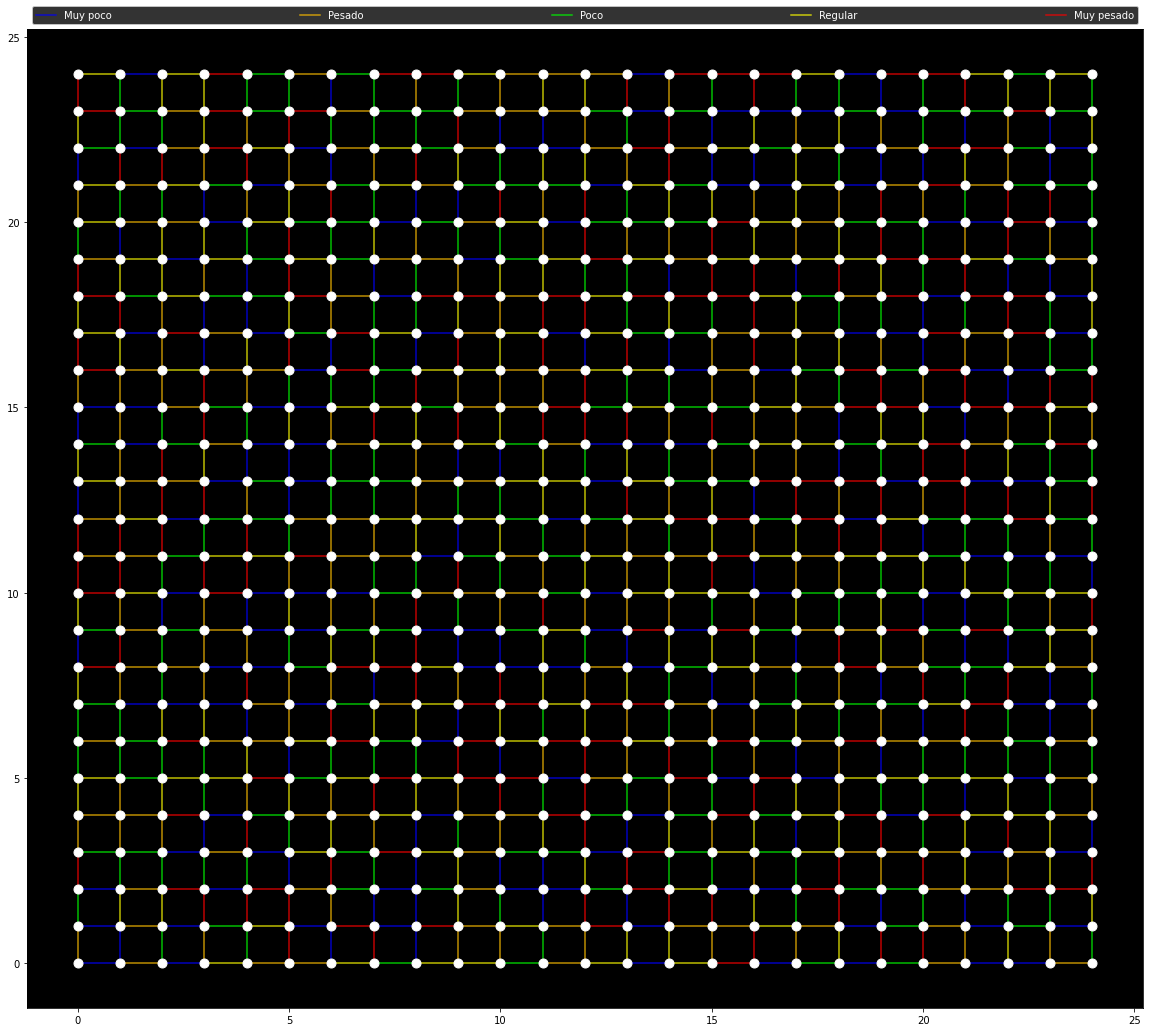

In [6]:
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (20, 18))
graficarCarreteras(grafo)
plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 18)
plt.legend(bbox_to_anchor = (0.0, 1.0, 1.0, 0.1), loc = 3, ncol = 5, mode = "expand", borderaxespad = 0.5)
for label in plt.legend(bbox_to_anchor = (0.0, 1.0, 1.0, 0.1), loc = 3, ncol = 5, mode = "expand", borderaxespad = 0.5).get_texts():
    label.set_color('w')